# A strawberry flavour gene vector for *Saccharomyces cerevisiae*

![strawberry](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Strawberry_gariguette_DSC03063.JPG/317px-Strawberry_gariguette_DSC03063.JPG "alttext")

This [Jupyter notebook](http://jupyter.org/index.html) describes the simulated cloning of the [strawberry](https://en.wikipedia.org/wiki/Strawberry) Fragaria × ananassa  alcohol acyltransferase [SAAT](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC139918/) gene and the construction of a *[S. cerevisiae](https://en.wikipedia.org/wiki/Saccharomyces_cerevisiae)* expression vector for this gene.

The SAAT gene is involved in the production of the strawberry fragrance. It is necessary to first produce cDNA, a process which is not decribed in this notebook. Here is a [recent protocol](https://www.ncbi.nlm.nih.gov/pubmed/24321691) for the extraction of nucleic acids from Strawberry.

In [1]:
# Import the pydna package functions
from pydna.all import *

In [2]:
# Give your email address to Genbank, so they can contact you.
# This is a requirement for using their services
gb=Genbank("bjornjobb@gmail.com")
# download the SAAT CDS from Genbank
# We know from inspecting the 
saat = gb.nucleotide("AF193791 REGION: 78..1895")

In [3]:
# The representation of the saat Dseqrecord object contains a link to Genbank
saat

Gbank(AF193791  78-1895)(-1818)

In [4]:
# design two new primers for SAAT
saat_amplicon = primer_design(saat)

In [5]:
fw="aa"+saat_amplicon.forward_primer
rv=saat_amplicon.reverse_primer

In [6]:
# We can set the primer identities to something descriptive
fw.id, rv.id = "fw_saat_cds", "rv_saat_cds"

In [7]:
saat_pcr_prod = pcr(fw,rv, saat)

In [8]:
# The result is an object of the Amplicon class 
saat_pcr_prod 

Amplicon(1820)

In [9]:
# The object has several useful methods like .figure() 
# which shows how the primers anneal 
saat_pcr_prod.figure()

  5ATGGACACCAAGATTGG...CCCACCTAATCCTCAGTAA3
                       ||||||||||||||||||| tm 53.4 (dbd) 58.3
                      3GGGTGGATTAGGAGTCATT5
5aaATGGACACCAAGATTGG3
   ||||||||||||||||| tm 52.2 (dbd) 58.5
  3TACCTGTGGTTCTAACC...GGGTGGATTAGGAGTCATT5

In [10]:
# read the cloning vector from a local file
pYPKa=read("pYPKa.gb")

In [11]:
# This is a GenbankFile object, its representation include a link to the local file:
pYPKa

File(pYPKa)(o3128)

In [12]:
# import the restriction enzyme AjiI from Biopython
from Bio.Restriction import AjiI

In [13]:
# cut the vector with the .linearize method. This will give an error is more than one 
# fragment is formed
pYPKa_AjiI = pYPKa.linearize(AjiI)

In [14]:
# The result from the digestion is a linear Dseqrecord object
pYPKa_AjiI

Dseqrecord(-3128)

In [15]:
# clone the PCR product by adding the linearized vector to the insert
# and close it using the .looped() method.
pYPKa_A_saat = ( pYPKa_AjiI + saat_pcr_prod ).looped()
pYPKa_A_saat

Dseqrecord(o4948)

In [16]:
# read promoter vector from a local file
pYPKa_Z_prom = read("pYPKa_Z_TEF1.gb")
# read terminator vector from a local file
pYPKa_E_term = read("pYPKa_E_TPI1.gb")

In [17]:
pYPKa_Z_prom

File(-)(o3721)

In [18]:
pYPKa_E_term

File(-)(o3724)

In [19]:
[pYPKa_Z_prom,pYPKa_Z_prom]

[File(-)(o3721), File(-)(o3721)]

In the cell below, primers relevant to the [Yeast Pathway Kit](http://pubs.acs.org/doi/abs/10.1021/acssynbio.5b00250) are read into six sequence objects. These are similar to the ones created in cell [3]

In [20]:
# Standard primers
p567,p577,p468,p467,p568,p578  =  parse_primers('''

>567_pCAPsAjiIF (23-mer)
GTcggctgcaggtcactagtgag
>577_crp585-557 (29-mer)
gttctgatcctcgagcatcttaagaattc

>468_pCAPs_release_fw (25-mer)
gtcgaggaacgccaggttgcccact
>467_pCAPs_release_re (31-mer) 
ATTTAAatcctgatgcgtttgtctgcacaga

>568_pCAPsAjiIR (22-mer) 
GTGCcatctgtgcagacaaacg
>578_crp42-70 (29-mer)
gttcttgtctcattgccacattcataagt''')

In [21]:
p567

567_pCAPsAjiIF 23-mer:5'-GTcggctgcaggtca..gag-3'

In [22]:
# Promoter amplified using p577 and p567
p = pcr(p577, p567, pYPKa_Z_prom)

In [23]:
# Gene amplified using p468 and p467
g = pcr(p468, p467, pYPKa_A_saat)

In [24]:
# Terminator amplified using p568 and p578
t = pcr(p568, p578, pYPKa_E_term)

In [25]:
# Yeast backbone vector read from a local file
pYPKpw = read("pYPKpw.gb")

In [26]:
from Bio.Restriction import ZraI

In [27]:
# Vector linearized with ZraI
pYPKpw_lin = pYPKpw.linearize(ZraI)

In [28]:
# Assembly simulation between four linear DNA fragments:
# plasmid, promoter, gene and terminator
# Only one circular product is formed (8769 bp)
asm = Assembly( (pYPKpw_lin, p, g, t) )

In [29]:
asm

Assembly
fragments..: 5603bp 811bp 1907bp 922bp
limit(bp)..: 25
G.nodes....: 8
algorithm..: common_sub_strings

In [30]:
# Inspect the only circular product
candidate = asm.assemble_circular()[0]
candidate.figure()

 -|pYPKpw_lin|124
|             \/
|             /\
|             124|811bp_PCR_prod|50
|                                \/
|                                /\
|                                50|1907bp_PCR_prod|37
|                                                   \/
|                                                   /\
|                                                   37|922bp_PCR_prod|242
|                                                                     \/
|                                                                     /\
|                                                                     242-
|                                                                        |
 ------------------------------------------------------------------------

In [31]:
# Synchronize vectors
pYPK0_TDH3_FaPDC_TEF1 = candidate.synced(pYPKa)

In [32]:
# Write new vector to local file
pYPK0_TDH3_FaPDC_TEF1.write("pYPK0_TDH3_FaPDC_TPI1.gb")

pYPK0_TDH3_FaPDC_TPI1.gb

The final vector pYPKa_TDH3_FaPDC_TEF1 has 8769 bp.
The sequence can be inspected by the hyperlink above.

The restriction enzyme [PvuI](http://rebase.neb.com/cgi-bin/reb_get.pl) cuts twice in the plasmid backbone and once in the SAAT gene.

In [33]:
from Bio.Restriction import PvuI

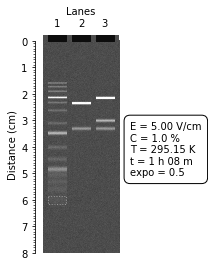

In [35]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
%matplotlib inline

from pydna.gel import Gel, weight_standard_sample

standard = weight_standard_sample('1kb+_GeneRuler')

Gel( [ standard, 
       pYPKpw.cut(PvuI),
       pYPK0_TDH3_FaPDC_TEF1.cut(PvuI) ] ).run()

The gel above shows that the empty vector (pYPKpw) is easily distinguishable from the expected
final construct by digestion with PvuI.